# Race, Cancer and Coverage in America
#### A Data Exploration by Jack Rory Staunton, PhD

##### Expected Outcomes
Access to quality healthcare is critical for prevention, diagnosis and treatment of cancer. Structural asymmetries in health insurance access may occur on the basis of race, and thus impact cancer incidence and patient outcomes. This preliminary exploration will draw inferences about the statistical interactions between race, insurance coverage and cancer incidence reported by county in America. Depending on the presence and nature of those interactions, the data may motivate further inquiry into this timely and important topic which directly and indirectly impacts the lives of millions of Americans. 

### How does race impact health insurance coverage? 
To address this question, I will examine the correlations between the percentages of the population that self-identify as white, black, asian, or other and the percentages of the population with government-provided, employer-provided, and privately-provided health insurance coverage.

### How does health insurance coverage impact cancer diagnosis? 
To address this question, I will examine the correlation between the the percentages of the population with government-provided, employer-provided, and privately-provided health insurance coverage and the mean number of reported cases of cancer diagnosis (normalized by estimated population).

### What is the relationship between race and cancer death diagnosis? 
To address this question, I will examine the correlation between median age and mean per capita cancer mortalities.



Provenance: 

Data on cancer  incidence and county population statistics from census.gov, clinicaltrials.gov, and cancer.gov were aggregated as described at https://data.world/nrippner/cancer-trials by data.world user nrippner. This dataset is kindly provided by nrippner and was accessed from https://query.data.world/s/3b96GyLkqZ1IgCONmj193k1yF59fNz on 2018-03-12. In the dataset, each row contains data from a county in United States. The columns are as follows: 

TARGET_deathRate: Dependent variable. Mean per capita (100,000) cancer mortalities(a)

avgAnnCount: Mean number of reported cases of cancer diagnosed annually(a)

avgDeathsPerYear: Mean number of reported mortalities due to cancer(a)

incidenceRate: Mean per capita (100,000) cancer diagoses(a)

medianIncome: Median income per county (b)

popEst2015: Population of county (b)

povertyPercent: Percent of populace in poverty (b)

studyPerCap: Per capita number of cancer-related clinical trials per county (a)

binnedInc: Median income per capita binned by decile (b)

MedianAge: Median age of county residents (b)

MedianAgeMale: Median age of male county residents (b)

MedianAgeFemale: Median age of female county residents (b)

Geography: County name (b)

AvgHouseholdSize: Mean household size of county (b)

PercentMarried: Percent of county residents who are married (b)

PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school (b)

PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma (b)

PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college (b)

PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree (b)

PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma (b)

PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree (b)

PctEmployed16_Over: Percent of county residents ages 16 and over employed (b)

PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed (b)

PctPrivateCoverage: Percent of county residents with private health coverage (b)

PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance) (b)

PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage (b)

PctPublicCoverage: Percent of county residents with government-provided health coverage (b)

PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone (b)

PctWhite: Percent of county residents who identify as White (b)

PctBlack: Percent of county residents who identify as Black (b)

PctAsian: Percent of county residents who identify as Asian (b)

PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian (b)

PctMarriedHouseholds: Percent of married households (b)

BirthRate: Number of live births relative to number of women in county (b)

(a): years 2010-2016

(b): 2013 Census Estimates

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
from matplotlib import cm
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
df = pd.read_csv('https://query.data.world/s/3b96GyLkqZ1IgCONmj193k1yF59fNz', encoding='latin-1')

Among counties with at least 10% Black population, linear regression on the percentage of black population vs. the percentage of population with only public health insurance yields: y = m*x + b with fit parameters m = 1.56 and b = -4.37. The correlation coefficient r^2 = 0.55 and p-value = 1.19e-63.
Among counties with at least 10% Black population, linear regression on the percentage of black population vs. the percentage of population with only private health insurance yields: y = m*x + b with fit parameters m = -0.86 and b = 68.18. The correlation coefficient r^2 = -0.50 and p-value = 6.95e-42.


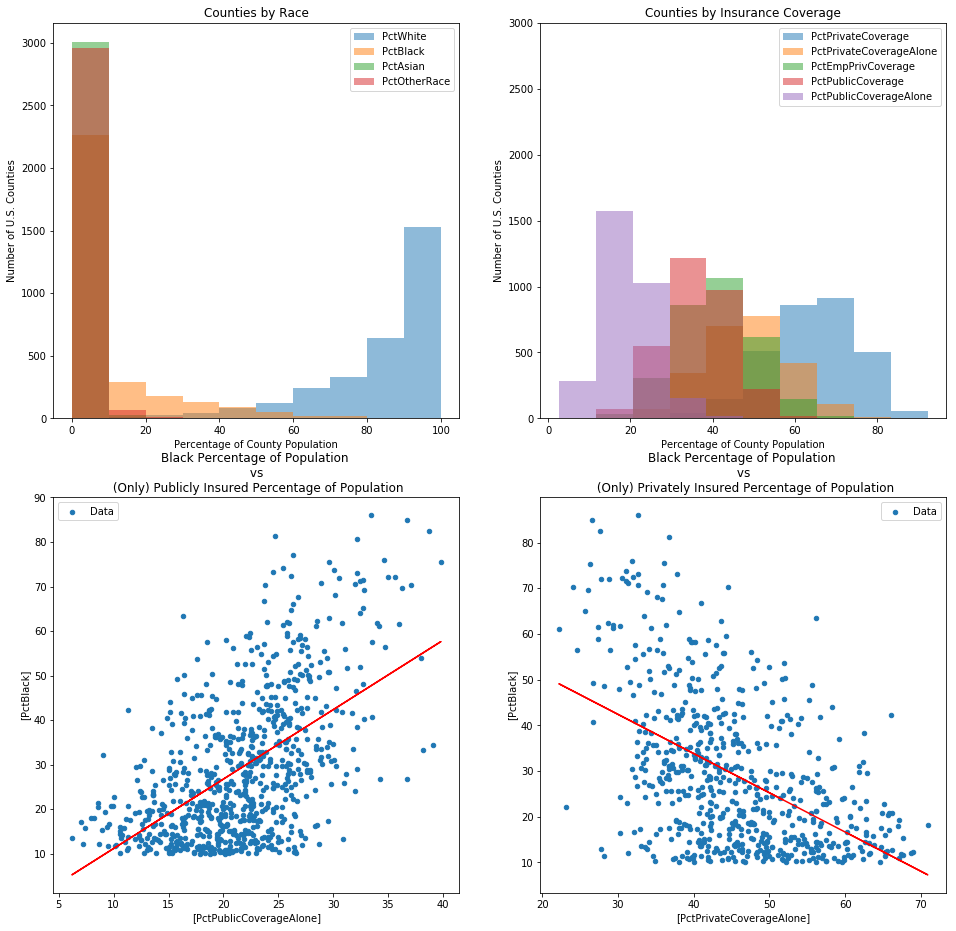

In [3]:
fig1 = plt.figure(figsize=(16,16))
gs1 = gs.GridSpec(2, 2)
ax1 = fig1.add_subplot(gs1[0])
ax2 = fig1.add_subplot(gs1[1])
ax3 = fig1.add_subplot(gs1[2])
ax4 = fig1.add_subplot(gs1[3])
# look at racial makeup in a histogram
race = df[['PctWhite', 'PctBlack', 'PctAsian', 'PctOtherRace']].copy()
racehist = race.plot.hist(alpha=0.5, ax=ax1)
ax1.set_xlabel('Percentage of County Population')
ax1.set_ylabel('Number of U.S. Counties')
ax1.set_title('Counties by Race')
# look at coverage type in a histogram
ins = df[['PctPrivateCoverage', 'PctPrivateCoverageAlone', 'PctEmpPrivCoverage', 'PctPublicCoverage', 'PctPublicCoverageAlone']].copy()
ins.plot.hist(alpha=0.5, ax=ax2)
ax2.set_xlabel('Percentage of County Population')
ax2.set_ylabel('Number of U.S. Counties')
ax2.set_title('Counties by Insurance Coverage')
ax2.set_ylim(0,3000)
# plot %race against %insurance coverage types 
df10 = df[df['PctBlack'] > 10]

#sns.regplot(df10.PctPublicCoverageAlone,df10.PctBlack, ax=ax3)
df10.plot.scatter(['PctPublicCoverageAlone'], ['PctBlack'], ax=ax3, label='Data')
x1 = df10.PctPublicCoverageAlone.values
y1 = df10.PctBlack.values
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(x1, y1)
fit1 = ax3.plot(x1, intercept1 + slope1*x1, 'r', label='fitted line')
ax3.set_title('Black Percentage of Population \n vs \n (Only) Publicly Insured Percentage of Population')
#ax3.set_xlim(10, 100)
#ax3.set_ylim(10, 100)
#ax3.legend([fit1], ['%Blk={}*%Public+{}'.format(str(slope1), str(intercept1))])
#sns.regplot(df10.PctPrivateCoverageAlone,df10.PctBlack, ax=ax4)
df10.plot.scatter(['PctPrivateCoverageAlone'], ['PctBlack'], ax=ax4, label='Data')
x2 = df10.PctPrivateCoverageAlone.values
y2 = df10.PctBlack.values
y2 = y2[pd.notna(x2)]
x2 = x2[pd.notna(x2)]
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(x2, y2)
fit2 = ax4.plot(x2, intercept2 + slope2*x2, 'r', label='fitted line')
ax4.set_title('Black Percentage of Population \n vs \n (Only) Privately Insured Percentage of Population')

string1 = '''Among counties with at least 10% Black population, \
linear regression on the percentage of black population \
vs. the percentage of population with only public health insurance yields: \
y = m*x + b with fit parameters m = {0:.2f} and b = {1:.2f}. \
The correlation coefficient r^2 = {2:.2f} and p-value = {3:.2e}.'''.format(slope1, intercept1, r_value1, p_value1)
print(string1)

string2 = '''Among counties with at least 10% Black population, \
linear regression on the percentage of black population \
vs. the percentage of population with only private health insurance yields: \
y = m*x + b with fit parameters m = {0:.2f} and b = {1:.2f}. \
The correlation coefficient r^2 = {2:.2f} and p-value = {3:.2e}.'''.format(slope2, intercept2, r_value2, p_value2)
print(string2)

The histograms in the top panels are plotted to show an overview of the distributions of data. They indicate that 'PctAsian' and 'PctOtherRaces' are primarily under 10%. For this reason we will focus on the 'PctBlack' data. The coverage types include overlapping subsets, and do not include the uninsured population. To simplify this initial inquiry, we will focus on data about individuals who have only one type of coverage, namely public alone or private alone. In the bottom panels we can see that there are some trends across counties regarding the percentage of the population that self-identifies as black, and the percentages of the population that are insured solely by private coverage or public coverage. Namely, the black population is positively correlated to public coverage and negatively correlated to private coverage. It is important to note that the r^2 values are not very high, in spite of the p values being very small. This suggests that the correlations are not very strong. Another caveat is our omission of counties with under 10% black population. Those counties appear to exhibit uniform distribution of public and private coverage across the range of those variables, such that their inclusion would weaken further the observed correlations. Most importantly, the data does not include information specific enough to ascertain on an individual basis, the race and insurance type of each person in the county. Data of this more specific kind would therefore be needed to substantiate any claim that black people are more likely to subscribe to public health insurance than private health insurance. Therefore taken alone, the observed trends may be suggestive but are not compelling. 

Text(0.5,0.98,'Cancer Diagnoses vs Insurance Type')

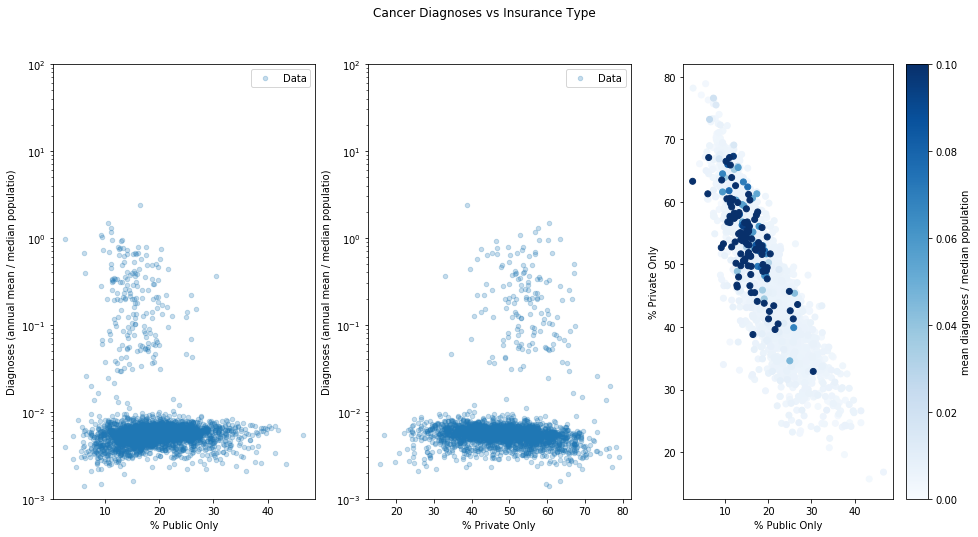

In [4]:
fig2 = plt.figure(figsize=(16,8))
gs2 = gs.GridSpec(1, 3)
ax5 = fig2.add_subplot(gs2[0])
ax6 = fig2.add_subplot(gs2[1])
ax7 = fig2.add_subplot(gs2[2])
df['diag'] = df['avgAnnCount']/df['popEst2015']

df.plot.scatter(['PctPublicCoverageAlone'], ['diag'], ax=ax5, label='Data', alpha=0.25)
ax5.set_yscale('log')
ax5.set_ylim(1e-3, 1e2)
x3 = df.PctPublicCoverageAlone.values
y3 = df.diag.values
ax5.set_xlabel('% Public Only')
ax5.set_ylabel('Diagnoses (annual mean / median populatio)')

df.plot.scatter(['PctPrivateCoverageAlone'], ['diag'], ax=ax6, label='Data', alpha=0.25)
ax6.set_yscale('log')
ax6.set_ylim(1e-3, 1e2)
ax6.set_xlabel('% Private Only')
ax6.set_ylabel('Diagnoses (annual mean / median populatio)')

x4 = df.PctPrivateCoverageAlone.values
y4 = y3[pd.notna(x4)]
x3 = x3[pd.notna(x4)]
x4 = x4[pd.notna(x4)]
indsort = y4.argsort()
y4 = y4[indsort]
x4 = x4[indsort]
x3 = x3[indsort]
cm = plt.cm.get_cmap('Blues')
colorscatter = ax7.scatter(x3,x4,c=y4, marker = 'o', cmap = cm, vmin=0, vmax=0.1, alpha=1 );
cbar = plt.colorbar(colorscatter)
cbar.set_label('mean diagnoses / median population')
ax7.set_xlabel('% Public Only')
ax7.set_ylabel('% Private Only')
fig2.suptitle('Cancer Diagnoses vs Insurance Type')


The plots above reveal firstly that there is a distinct subset of counties with a higher percentage of cancer diagnoses. I surmise that this is due to better preventative healthcare, rather than increased numbers of true incidence of cancer, since the data have been normalized by the estimated population size. On this assumption, I projected the diagnosis against the percentages of the population with only public insurance (on the left plot) and only private insurance (on the middle plot). The counties with (presumably) better preventative care cluster toward the left on the left plot, indicating they have a considerably lower fraction of citizens that are insured only by public healthcare. They also cluster toward the right on the middle plot, indicating they have a slightly higher than average fraction of citizens that are insured only by private healthcare. The plot on the right combines all of this data, where the axes are the public and private percentages and the color of each datum is mapped to the number of diagnoses according to the colorbar. This gives a better idea of how the data are spread in this three dimensional space. Though not quantitative, these figures do suggest that among the counties in which better preventative care is giving rise to a higher number of (hopefully early and thus manageable) diagnoses of cancer, more people are insured with private than public health insurance. To follow up on that hypothesis, it would help to have a more thorough annotation of this data, especially a better delineation of e.g. uninsured, only publicly insured by self, only publicly insured by employer, etc. 